In [ ]:
import numpy as np
from scipy.fft import fft, ifft
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

fill_value = -32767.0

print("2004-2013") 
nc_file_1 = nc.Dataset('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2004 = np.array(nc_file_1.variables['sst'][:])
sst_2004 = np.where(Raw_sst_2004 == fill_value, np.nan, Raw_sst_2004)
latitudes = np.array(nc_file_1.variables['lat'][:])
longitudes = np.array(nc_file_1.variables['lon'][:])
nc_file_1.close()

nc_file_2 = nc.Dataset('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2013 = np.array(nc_file_2.variables['sst'][:])
sst_2013 = np.where(Raw_sst_2013 == fill_value, np.nan, Raw_sst_2013)
nc_file_2.close()

lat_indices = np.where((latitudes >= -30) & (latitudes <= 30))[0]
lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]

sst_2004 = sst_2004[lat_indices, :][:, lon_indices]
sst_2013 = sst_2013[lat_indices, :][:, lon_indices]

mask = ~np.isnan(sst_2004) & ~np.isnan(sst_2013)
sst_2004 = sst_2004[mask]
sst_2013 = sst_2013[mask]

mean_2004 = np.mean(sst_2004)
mean_2013 = np.mean(sst_2013)
sst_2004_Anomaly = sst_2004 - mean_2004
sst_2013_Anomaly = sst_2013 - mean_2013

correlation_matrix = np.corrcoef(sst_2004_Anomaly, sst_2013_Anomaly)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation Coefficient:", correlation_coefficient)

def cross_correlation_fft(data1, data2):
    n = len(data1) + len(data2) - 1
    f_data1 = fft(data1, n=n)
    f_data2 = fft(data2, n=n)
    cross_corr = ifft(f_data1 * np.conj(f_data2)).real
    return cross_corr

data1 = sst_2004_Anomaly
data2 = sst_2013_Anomaly

cross_corr = cross_correlation_fft(data1, data2)
n=len(cross_corr)
p=cross_corr[(n//2)+1:]
p=np.append(p,cross_corr[:(n//2)+1])
cross_corr=p
lags = np.arange(-len(data1) + 1, len(data1))    Corrected lags calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(lags, cross_corr)

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr, marker='o', linestyle='-')
plt.title('Cross-Correlation')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation Value')
plt.grid()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(lags, cross_corr)

 print(f"Slope: {slope}")
 print(f"Intercept: {intercept}")

 plt.figure(figsize=(10, 5))
 plt.plot(lags, cross_corr, marker='o', linestyle='-', label='Cross-Correlation')
 plt.plot(lags, intercept + slope * lags, 'r', label='Fitted Line')
 plt.title('Cross-Correlation with Fitted Line')
 plt.xlabel('Lag')
 plt.ylabel('Cross-Correlation Value')
 plt.legend()
 plt.grid()
 plt.show()


0.9906100824384759
2.680378566658734e-06


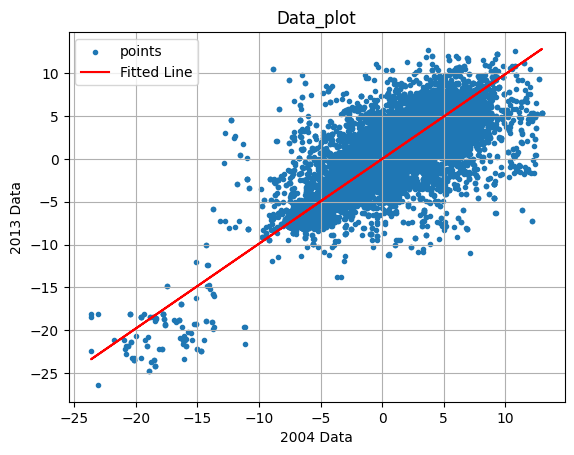

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sst_2004_Anomaly, sst_2013_Anomaly)
print(slope)
print(intercept)
plt.figure(figure=(10,6))
plt.scatter(sst_2004_Anomaly,sst_2013_Anomaly,marker='.',label='points')
plt.plot(sst_2004_Anomaly,intercept+slope*sst_2004_Anomaly,color='r',label='Fitted Line')
plt.title("Data_plot")
plt.xlabel("2004 Data")
plt.ylabel("2013 Data")
plt.grid()
plt.legend()
plt.show()

In [55]:
print(mean_2004)
print(mean_2013)
print((sst_2004).max())
print(np.array(np.where( (sst_2004_Anomaly>=-25) ) ) )
print(np.array(np.where( (sst_2023_Anomaly>=-25) ) ) )

26.946945
27.14589
39.915
[[      0       1       2 ... 2120455 2120456 2120457]]
[[      0       1       2 ... 2120455 2120456 2120457]]
[ True  True  True ...  True  True  True]


In [5]:
import numpy as np
from scipy.fft import fft, ifft
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

fill_value = -32767.0

print("2004-2013")
nc_file_1 = nc.Dataset('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2013 = np.array(nc_file_1.variables['sst'][:])
sst_2004 = np.where(Raw_sst_2013 == fill_value, np.nan, Raw_sst_2013)
latitudes = np.array(nc_file_1.variables['lat'][:])
longitudes = np.array(nc_file_1.variables['lon'][:])
nc_file_1.close()

nc_file_2 = nc.Dataset('AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2023 = np.array(nc_file_2.variables['sst'][:])
sst_2023 = np.where(Raw_sst_2023 == fill_value, np.nan, Raw_sst_2023)
nc_file_2.close()

lat_indices = np.where((latitudes >= -30) & (latitudes <= 30))[0]
lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]

sst_2004 = sst_2004[lat_indices, :][:, lon_indices]
sst_2023 = sst_2023[lat_indices, :][:, lon_indices]

mask = ~np.isnan(sst_2004) & ~np.isnan(sst_2023)
sst_2004 = sst_2004[mask]
sst_2023 = sst_2023[mask]

mean_2004 = np.mean(sst_2004)
mean_2023 = np.mean(sst_2023)
sst_2004_Anomaly = sst_2004 - mean_2004
sst_2023_Anomaly = sst_2023 - mean_2013

correlation_matrix = np.corrcoef(sst_2004_Anomaly, sst_2023_Anomaly)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation Coefficient:", correlation_coefficient)

def cross_correlation_fft(data1, data2):
    n = len(data1) + len(data2) - 1
    f_data1 = fft(data1, n=n)
    f_data2 = fft(data2, n=n)
    cross_corr = ifft(f_data1 * np.conj(f_data2)).real
    return cross_corr

data1 = sst_2004_Anomaly
data2 = sst_2023_Anomaly

cross_corr = cross_correlation_fft(data1, data2)
n=len(cross_corr)
p=cross_corr[(n//2)+1:]
p=np.append(p,cross_corr[:(n//2)+1])
cross_corr=p
lags = np.arange(-len(data1) + 1, len(data1))    Corrected lags calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(lags, cross_corr)

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr, marker='o', linestyle='-')
plt.title('Cross-Correlation')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation Value')
plt.grid()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(lags, cross_corr)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr, marker='o', linestyle='-', label='Cross-Correlation')
plt.plot(lags, intercept + slope * lags, 'r', label='Fitted Line')
plt.title('Cross-Correlation with Fitted Line')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation Value')
plt.legend()
plt.grid()
plt.show()


2004-2013
Correlation Coefficient: 0.9669620779555455


2004-2013
mean:  26.946945 27.14589
Total no. of points:   2120458
count of specific region:   4085
percentage of points:   0.0019264706021057715
0.9906100824384759
2.680378566658734e-06


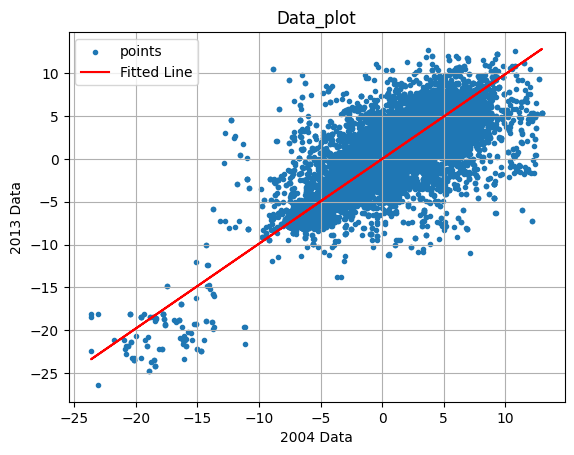

In [50]:
import numpy as np
from scipy.fft import fft, ifft
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

fill_value = -32767.0

print("2004-2013")
nc_file_1 = nc.Dataset('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2013 = np.array(nc_file_1.variables['sst'][:])
sst_2004 = np.where(Raw_sst_2013 == fill_value, np.nan, Raw_sst_2013)
latitudes = np.array(nc_file_1.variables['lat'][:])
longitudes = np.array(nc_file_1.variables['lon'][:])
nc_file_1.close()

nc_file_2 = nc.Dataset('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2013 = np.array(nc_file_2.variables['sst'][:])
sst_2013 = np.where(Raw_sst_2013 == fill_value, np.nan, Raw_sst_2013)
nc_file_2.close()

lat_indices = np.where((latitudes >= -30) & (latitudes <= 30))[0]
lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]

sst_2004 = sst_2004[lat_indices, :][:, lon_indices]
sst_2013 = sst_2013[lat_indices, :][:, lon_indices]

mask = ~np.isnan(sst_2004) & ~np.isnan(sst_2013)
sst_2004 = sst_2004[mask]
sst_2013 = sst_2013[mask]

mean_2004 = np.mean(sst_2004)
mean_2013 = np.mean(sst_2013)
sst_2004_Anomaly = sst_2004 - mean_2004
sst_2013_Anomaly = sst_2013 - mean_2013

print("mean: ",mean_2004,mean_2013)
mask0 = (sst_2004_Anomaly >=5) & (sst_2013_Anomaly >= -5) & (sst_2013_Anomaly <= 10)
print("Total no. of points:  ",mask0.size)
print("count of specific region:  ",mask0[mask0==True].size)
print("percentage of points:  ",mask0[mask0==True].size/mask0.size  )

slope, intercept, r_value, p_value, std_err = stats.linregress(sst_2004_Anomaly, sst_2013_Anomaly)
print(slope)
print(intercept)
plt.figure(figure=(10,6))
plt.scatter(sst_2004_Anomaly,sst_2013_Anomaly,marker='.',label='points')
plt.plot(sst_2004_Anomaly,intercept+slope*sst_2004_Anomaly,color='r',label='Fitted Line')
plt.title("Data_plot")
plt.xlabel("2004 Data")
plt.ylabel("2013 Data")
plt.grid()
plt.legend()
plt.show()

In [7]:
print(mean_2004)
print(mean_2023)
print((sst_2023).max())
print(np.array(np.where( (sst_2004_Anomaly>=-25) ) ) )
print(np.array(np.where( (sst_2023_Anomaly>=-25) ) ) )

26.945002
27.356491
39.815
[[      0       1       2 ... 2119808 2119809 2119810]]
[[      0       1       2 ... 2119808 2119809 2119810]]


In [60]:
import numpy as np
from scipy.fft import fft, ifft
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

fill_value = -32767.0

print("2013-2023")
nc_file_1 = nc.Dataset('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2013 = np.array(nc_file_1.variables['sst'][:])
sst_2013 = np.where(Raw_sst_2013 == fill_value, np.nan, Raw_sst_2013)
latitudes = np.array(nc_file_1.variables['lat'][:])
longitudes = np.array(nc_file_1.variables['lon'][:])
nc_file_1.close()

nc_file_2 = nc.Dataset('AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', 'r')
Raw_sst_2023 = np.array(nc_file_2.variables['sst'][:])
sst_2023 = np.where(Raw_sst_2023 == fill_value, np.nan, Raw_sst_2023)
nc_file_2.close()

lat_indices = np.where((latitudes >= -30) & (latitudes <= 30))[0]
lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]

sst_2013 = sst_2013[lat_indices, :][:, lon_indices]
sst_2023 = sst_2023[lat_indices, :][:, lon_indices]

mask = ~np.isnan(sst_2013) & ~np.isnan(sst_2023)
sst_2013 = sst_2013[mask]
sst_2023 = sst_2023[mask]

mean_2013 = np.mean(sst_2013)
mean_2023 = np.mean(sst_2023)
sst_2013_Anomaly = sst_2013 - mean_2013
sst_2023_Anomaly = sst_2023 - mean_2023

correlation_matrix = np.corrcoef(sst_2013_Anomaly, sst_2023_Anomaly)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation Coefficient:", correlation_coefficient)

def cross_correlation_fft(data1, data2):
    n = len(data1) + len(data2) - 1
    f_data1 = fft(data1, n=n)
    f_data2 = fft(data2, n=n)
    cross_corr = ifft(f_data1 * np.conj(f_data2)).real
    return cross_corr

data1 = sst_2013_Anomaly
data2 = sst_2023_Anomaly

cross_corr = cross_correlation_fft(data1, data2)
n=len(cross_corr)
p=cross_corr[(n//2)+1:]
p=np.append(p,cross_corr[:(n//2)+1])
cross_corr=p
lags = np.arange(-len(data1) + 1, len(data1))    Corrected lags calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(lags, cross_corr)

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr, marker='o', linestyle='-')
plt.title('Cross-Correlation')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation Value')
plt.grid()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(lags, cross_corr)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr, marker='o', linestyle='-', label='Cross-Correlation')
plt.plot(lags, intercept + slope * lags, 'r', label='Fitted Line')
plt.title('Cross-Correlation with Fitted Line')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation Value')
plt.legend()
plt.grid() 
plt.show()

2013-2023
Correlation Coefficient: 0.9640298716843817


In [23]:
import numpy as np
from scipy.fft import fft, ifft
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

def Analyse(f1,f2,Year_label) :
    fill_value = -32767.0

    print(Year_label)
    nc_file_1 = nc.Dataset(f1, 'r')
    Raw_sst_1 = np.array(nc_file_1.variables['sst'][:])
    sst_1 = np.where(Raw_sst_1 == fill_value, np.nan, Raw_sst_1)
    latitudes = np.array(nc_file_1.variables['lat'][:])
    longitudes = np.array(nc_file_1.variables['lon'][:])
    nc_file_1.close()

  Load and process data for 2013
    nc_file_2 = nc.Dataset(f2, 'r')
    Raw_sst_2 = np.array(nc_file_2.variables['sst'][:])
    sst_2 = np.where(Raw_sst_2 == fill_value, np.nan, Raw_sst_2)
    nc_file_2.close()

    lat_indices = np.where((latitudes >= -30) & (latitudes <= 30))[0]
    lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]
    
    sst_1 = sst_1[lat_indices, :][:, lon_indices]
    sst_2 = sst_2[lat_indices, :][:, lon_indices]
    
    mask = ~np.isnan(sst_1) & ~np.isnan(sst_2)
    sst_1 = sst_1[mask]
    sst_2 = sst_2[mask]
    
    mean_1 = np.mean(sst_1)
    mean__2 = np.mean(sst_2)
    sst_1_Anomaly = sst_1 - mean_1
    sst_2_Anomaly = sst_2 - mean_2
    
    correlation_matrix = np.corrcoef(sst_1_Anomaly, sst_2_Anomaly)
    correlation_coefficient = correlation_matrix[0, 1]
    
    print("Correlation Coefficient:", correlation_coefficient)
    
    def cross_correlation_fft(data1, data2):
        n = len(data1) + len(data2) - 1
        f_data1 = fft(data1, n=n)
        f_data2 = fft(data2, n=n)
        cross_corr = ifft(f_data1 * np.conj(f_data2)).real
        return cross_corr
    
    data1 = sst_1_Anomaly
    data2 = sst_2_Anomaly
    
    cross_corr = cross_correlation_fft(data1, data2)
    n=len(cross_corr)
    p=cross_corr[(n//2)+1:]
    p=np.append(p,cross_corr[:(n//2)+1])
    cross_corr=p
    lags = np.arange(-len(data1) + 1, len(data1))    Corrected lags calculation
    slope, intercept, r_value, p_value, std_err = stats.linregress(data1, data2)
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")

Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc',"2004-2013")
Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc',"2004-2023")
Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc',"2013-2023")

2004-2013
Correlation Coefficient: 0.9802689629342023
Slope: 0.990610080826047
Intercept: 11.712640195528275
2004-2023
Correlation Coefficient: 0.9669620785621277
Slope: 0.9409319087570512
Intercept: 11.92324562946141
2013-2023
Correlation Coefficient: 0.9640298723318365
Slope: 0.9281097232148094
Intercept: 11.923700834019854


In [35]:
import numpy as np
from scipy.fft import fft, ifft
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

def Analyse(f1,f2,Year_label,Latitude_range) :
    fill_value = -32767.0
    print(Latitude_range)
    nc_file_1 = nc.Dataset(f1, 'r')
    Raw_sst_1 = np.array(nc_file_1.variables['sst'][:])
    sst_1 = np.where(Raw_sst_1 == fill_value, np.nan, Raw_sst_1)
    latitudes = np.array(nc_file_1.variables['lat'][:])
    longitudes = np.array(nc_file_1.variables['lon'][:])
    nc_file_1.close()

    nc_file_2 = nc.Dataset(f2, 'r')
    Raw_sst_2 = np.array(nc_file_2.variables['sst'][:])
    sst_2 = np.where(Raw_sst_2 == fill_value, np.nan, Raw_sst_2)
    nc_file_2.close()

    lat_indices = np.where((latitudes >= Latitude_range[0]) & (latitudes <= Latitude_range[1]))[0]
    lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]
    
    sst_1 = sst_1[lat_indices, :][:, lon_indices]
    sst_2 = sst_2[lat_indices, :][:, lon_indices]
    
    mask = ~np.isnan(sst_1) & ~np.isnan(sst_2)
    sst_1 = sst_1[mask]
    sst_2 = sst_2[mask]
    
    mean_1 = np.mean(sst_1)
    mean__2 = np.mean(sst_2)
    sst_1_Anomaly = sst_1 - mean_1
    sst_2_Anomaly = sst_2 - mean_2
    
    correlation_matrix = np.corrcoef(sst_1_Anomaly, sst_2_Anomaly)
    correlation_coefficient = correlation_matrix[0, 1]
    
    print("Correlation Coefficient:", correlation_coefficient)
    
    def cross_correlation_fft(data1, data2):
        n = len(data1) + len(data2) - 1
        f_data1 = fft(data1, n=n)
        f_data2 = fft(data2, n=n)
        cross_corr = ifft(f_data1 * np.conj(f_data2)).real
        return cross_corr
    
    data1 = sst_1_Anomaly
    data2 = sst_2_Anomaly
    
    cross_corr = cross_correlation_fft(data1, data2)
    n=len(cross_corr)
    p=cross_corr[(n//2)+1:]
    p=np.append(p,cross_corr[:(n//2)+1])
    cross_corr=p
    lags = np.arange(-len(data1) + 1, len(data1))    Corrected lags calculation
    slope, intercept, r_value, p_value, std_err = stats.linregress(data1, data2)
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print("Size_1:",len(sst_1))
    print("Size_2:",len(sst_2))

Year_label="2004-2013"
print(Year_label)

for i in range(-30,21,10) :
    Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc',"2004-2013", (i,i+10) )

2004-2013
(-30, -20)
Correlation Coefficient: 0.9397970636434028
Slope: 0.9838330763103611
Intercept: 8.007411456449061
Size_1: 453666
Size_2: 453666
(-20, -10)
Correlation Coefficient: 0.9015338571209947
Slope: 0.9064595741321217
Intercept: 11.431202863491535
Size_1: 451930
Size_2: 451930
(-10, 0)
Correlation Coefficient: 0.9229637352334629
Slope: 0.952663836120732
Intercept: 13.48849095649398
Size_1: 432939
Size_2: 432939
(0, 10)
Correlation Coefficient: 0.9444139107645775
Slope: 0.8841177029367334
Intercept: 13.902541910234785
Size_1: 376238
Size_2: 376238
(10, 20)
Correlation Coefficient: 0.9053085818274575
Slope: 0.8568122945626665
Intercept: 12.580015561797097
Size_1: 312587
Size_2: 312587
(20, 30)
Correlation Coefficient: 0.806217023792213
Slope: 0.8448753074756097
Intercept: 11.11375219949584
Size_1: 93098
Size_2: 93098


2004-2013
(-30, 30)
Correlation Coefficient: 0.9802689626341445


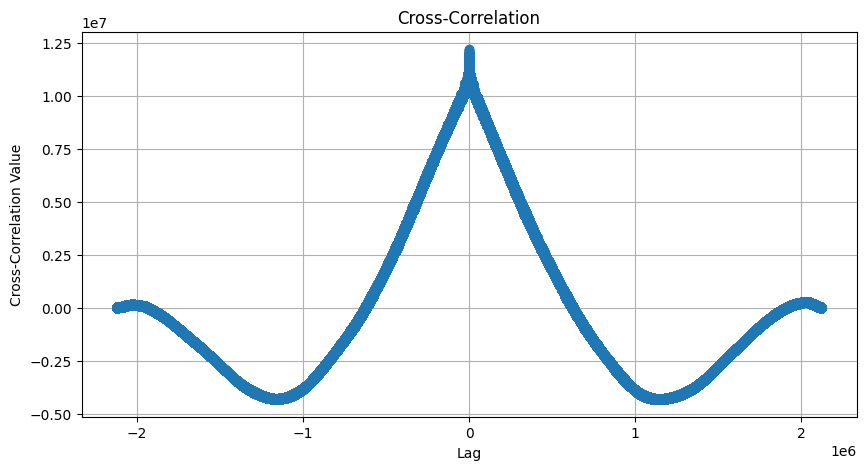

Slope: 0.9906100824384759
Intercept: 2.680378566658734e-06
2004-2013
(-30, -20)
Correlation Coefficient: 0.9397970635636219


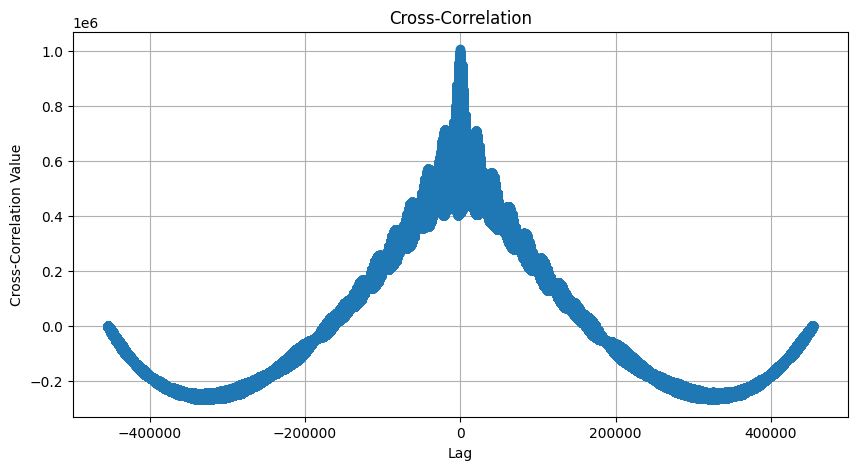

Slope: 0.9838330775559024
Intercept: 3.08833597572943e-06
2004-2013
(-20, -10)
Correlation Coefficient: 0.9015338564877455


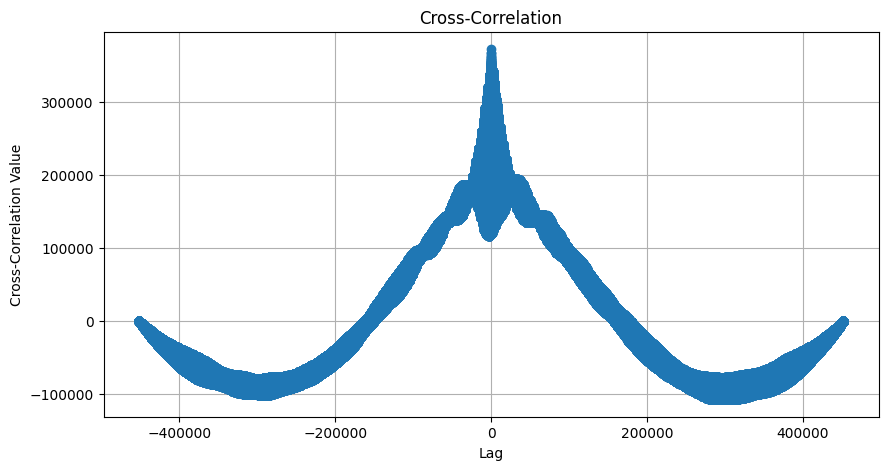

Slope: 0.9064595776350612
Intercept: 2.4944181484928008e-06
2004-2013
(-10, 0)
Correlation Coefficient: 0.9229637350651205


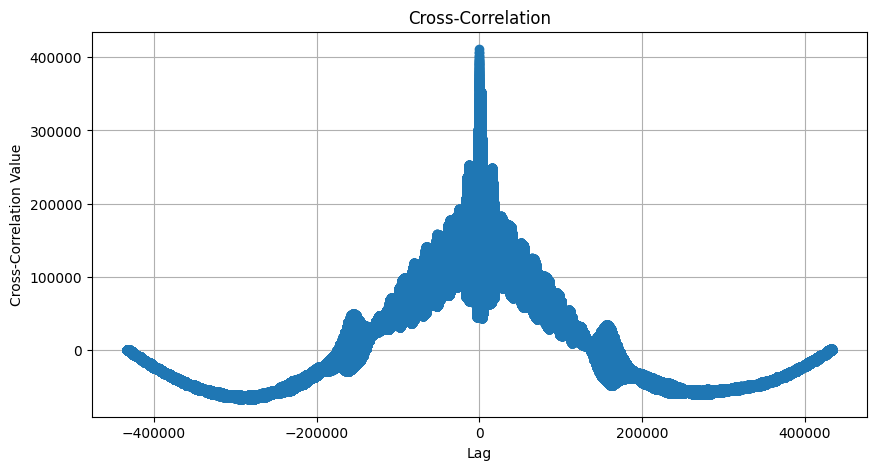

Slope: 0.9526638428918434
Intercept: 1.759910626563042e-06
2004-2013
(0, 10)
Correlation Coefficient: 0.9444139087926389


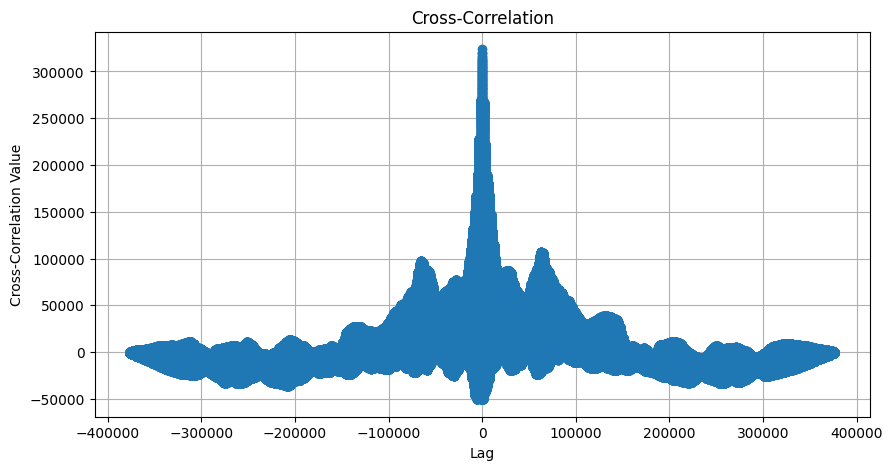

Slope: 0.884117711996329
Intercept: 7.516815756655338e-06
2004-2013
(10, 20)
Correlation Coefficient: 0.9053085799640158


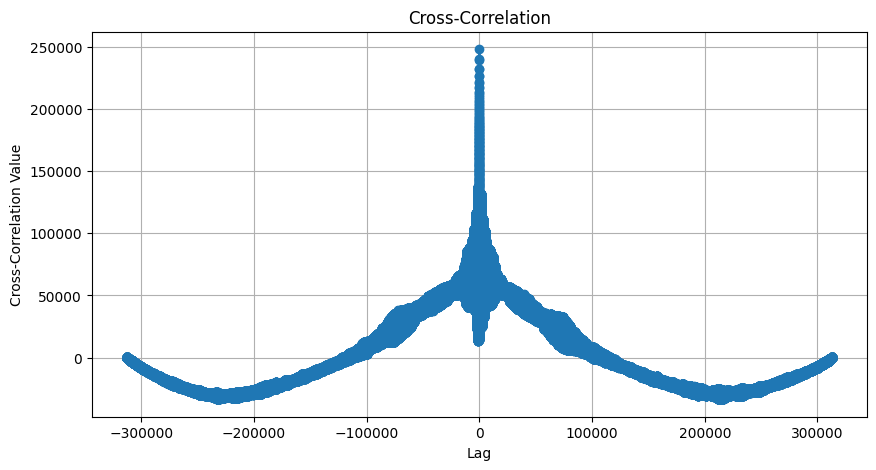

Slope: 0.8568123040001174
Intercept: 6.269135579179351e-06
2004-2013
(20, 30)
Correlation Coefficient: 0.8062170216348422


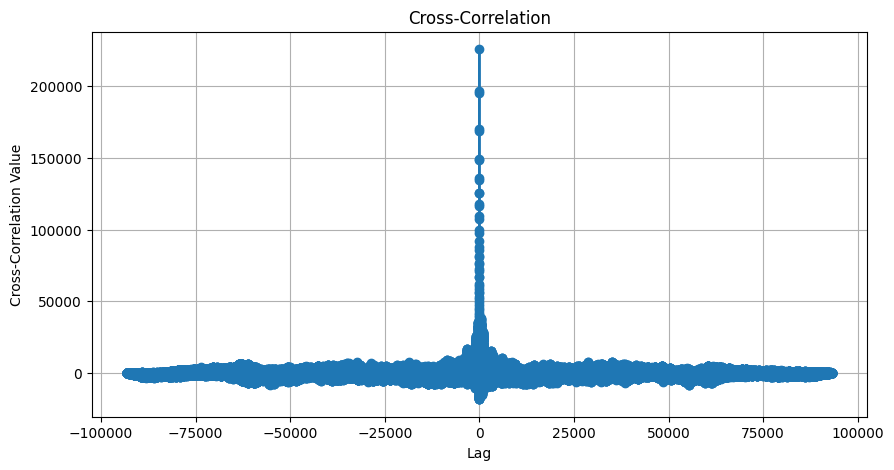

Slope: 0.8448753258688256
Intercept: -2.8430915636784627e-06
2004-2023
(-30, 30)
Correlation Coefficient: 0.9669620779555455


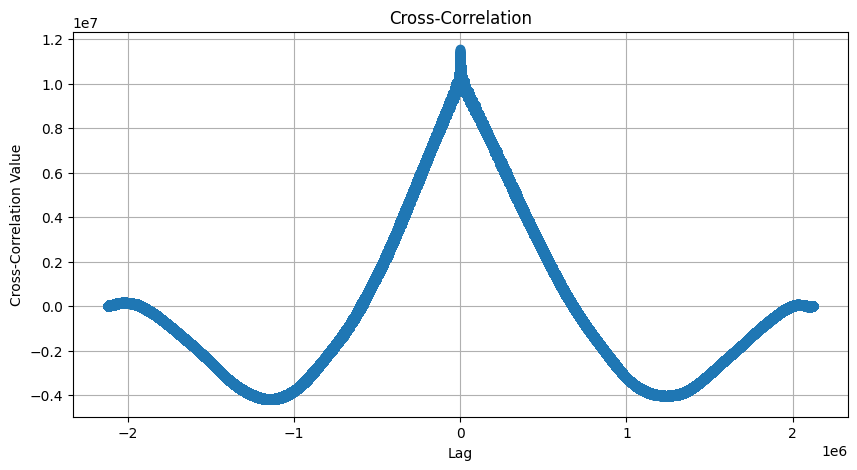

Slope: 0.9409319104911177
Intercept: 6.913612109114165e-07
2004-2023
(-30, -20)
Correlation Coefficient: 0.9345128360176457


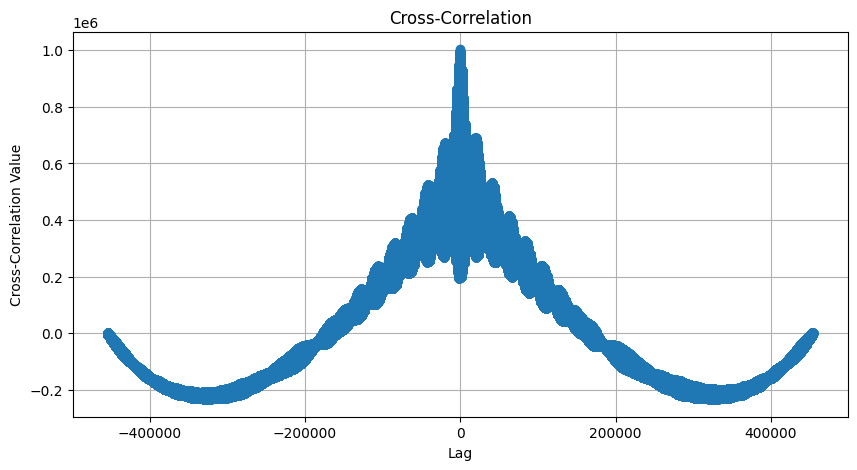

Slope: 0.9857726825992753
Intercept: -7.1235441850970955e-06
2004-2023
(-20, -10)
Correlation Coefficient: 0.8446800843927573


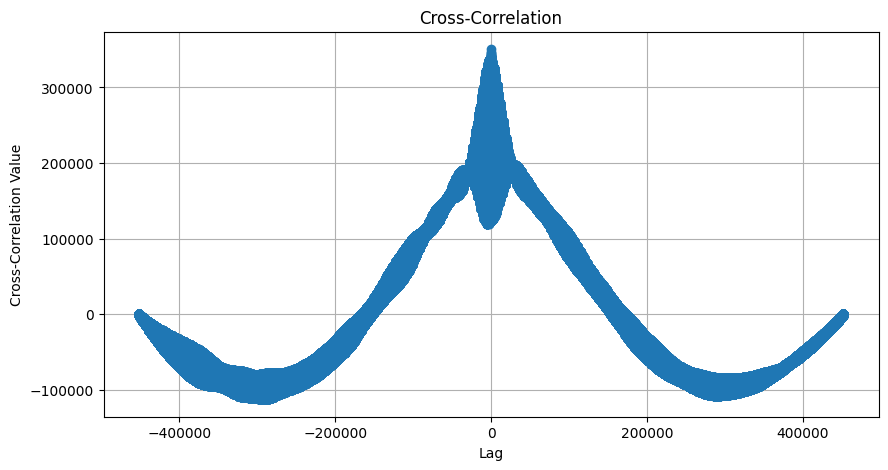

Slope: 0.8591998887049169
Intercept: -7.915186517191174e-07
2004-2023
(-10, 0)
Correlation Coefficient: 0.7517429837341795


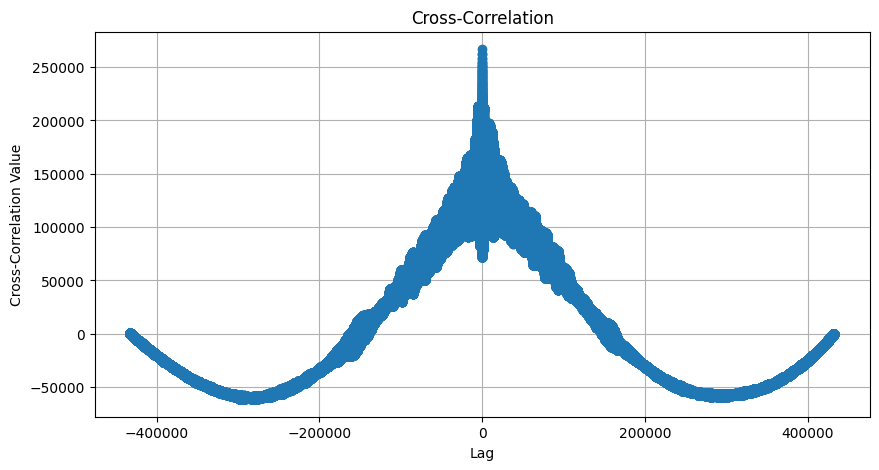

Slope: 0.6217269701389114
Intercept: 1.8390774590193619e-06
2004-2023
(0, 10)
Correlation Coefficient: 0.9157808134516274


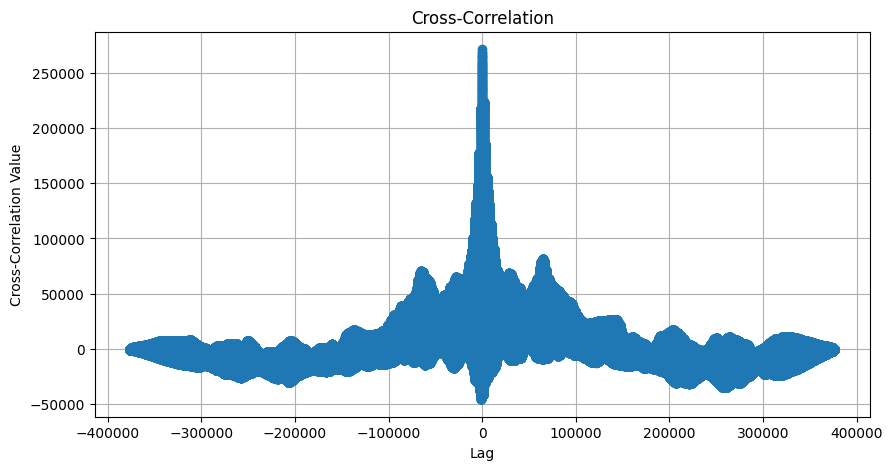

Slope: 0.7433026028561357
Intercept: -9.929709740261932e-07
2004-2023
(10, 20)
Correlation Coefficient: 0.9206551466050397


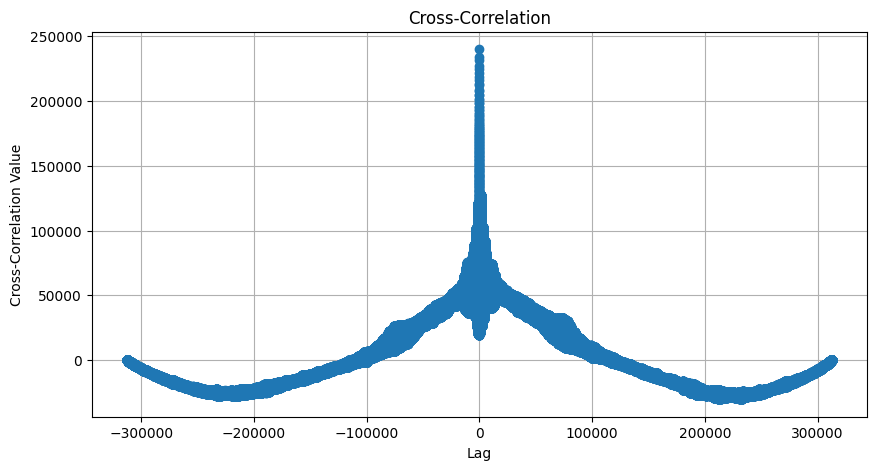

Slope: 0.8340118363099375
Intercept: -1.6449791816831406e-08
2004-2023
(20, 30)
Correlation Coefficient: 0.7845797470952666


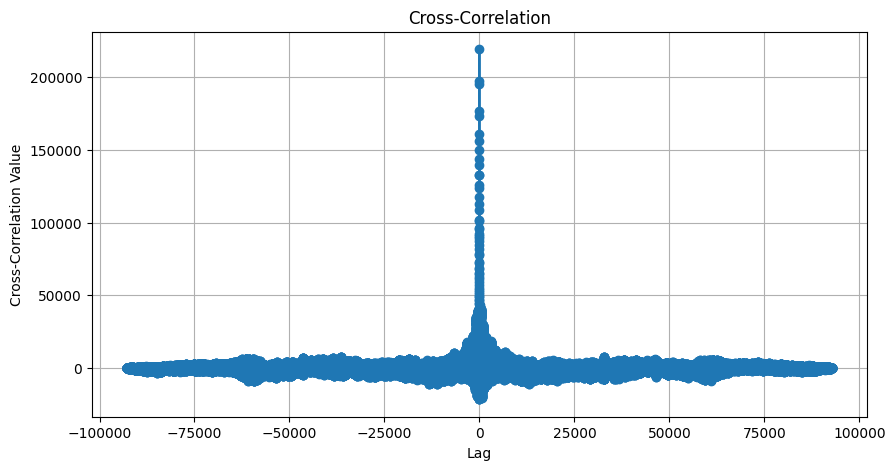

Slope: 0.8689239625636813
Intercept: -2.0609717555275283e-06
2013-2023
(-30, 30)
Correlation Coefficient: 0.9640298716843817


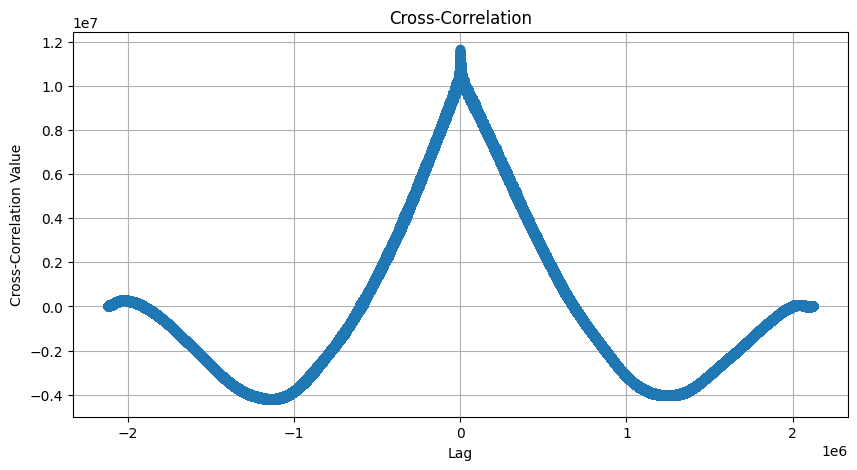

Slope: 0.9281097249329987
Intercept: -1.1811949481131989e-07
2013-2023
(-30, -20)
Correlation Coefficient: 0.9052964555524856


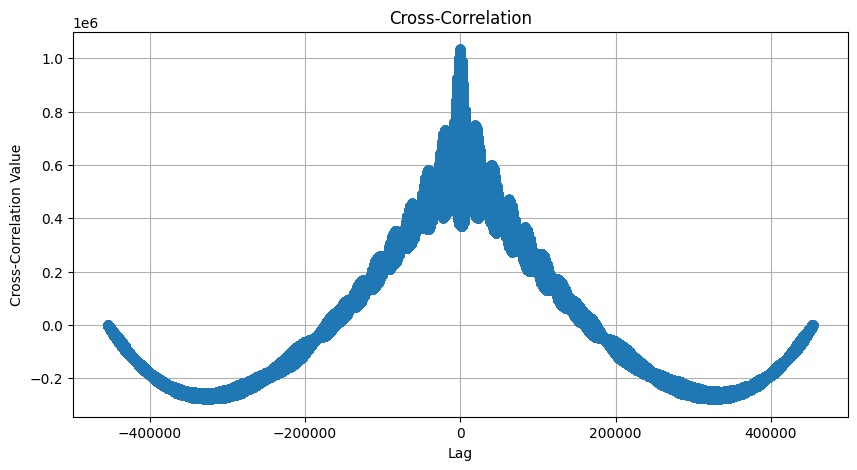

Slope: 0.911602340023259
Intercept: 1.2273420490017282e-06
2013-2023
(-20, -10)
Correlation Coefficient: 0.8456756322295363


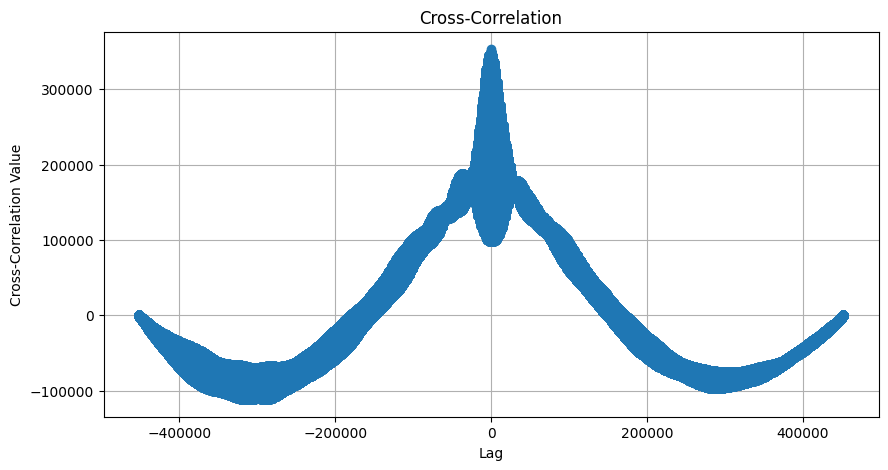

Slope: 0.8558224117702815
Intercept: 4.724778509773616e-06
2013-2023
(-10, 0)
Correlation Coefficient: 0.7517824554149669


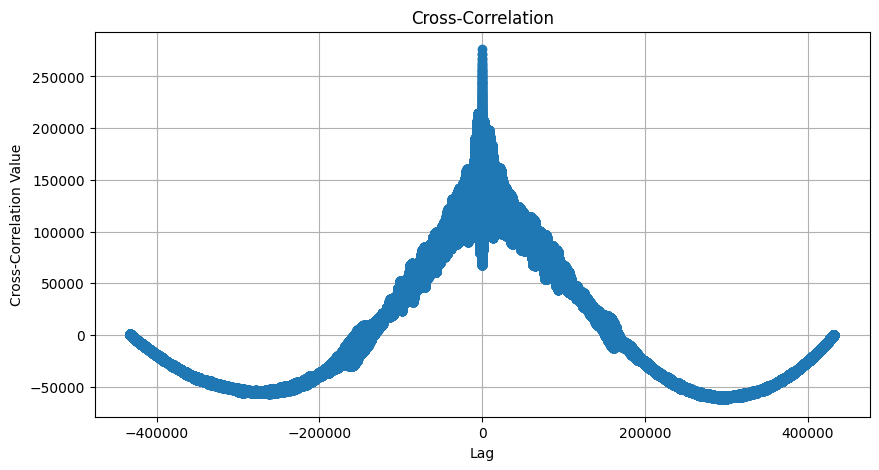

Slope: 0.6017444185015084
Intercept: -4.711668543225242e-06
2013-2023
(0, 10)
Correlation Coefficient: 0.9205485491238137


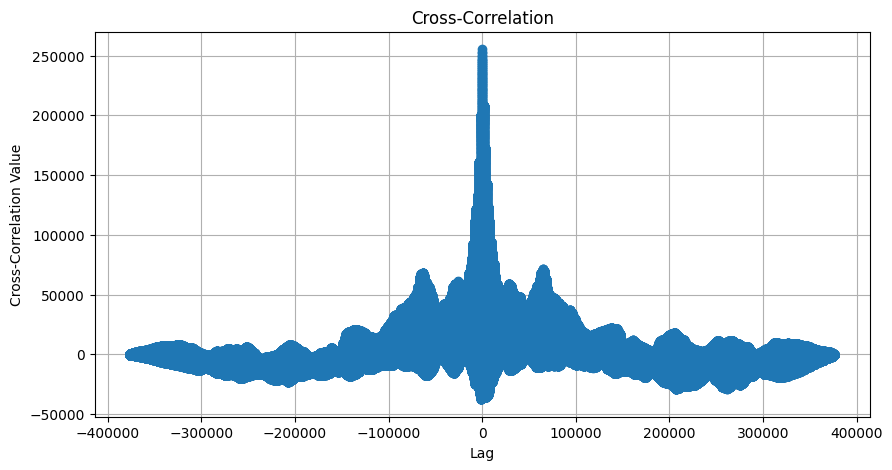

Slope: 0.7974052976064125
Intercept: 7.884703274963158e-07
2013-2023
(10, 20)
Correlation Coefficient: 0.9013050979434031


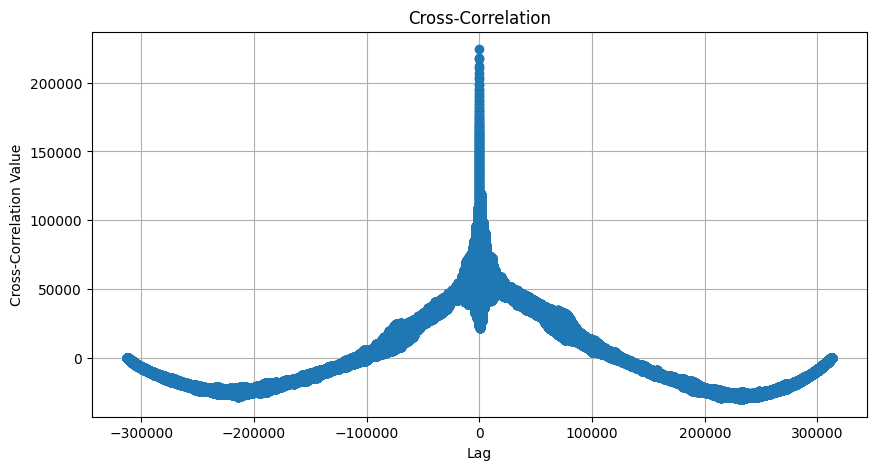

Slope: 0.8621107529135675
Intercept: -2.2659172983212796e-07
2013-2023
(20, 30)
Correlation Coefficient: 0.7797310317751492


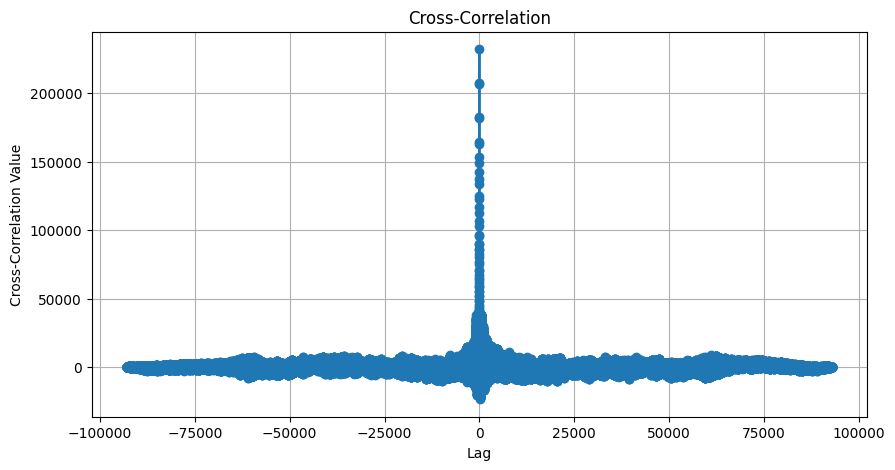

Slope: 0.8206639388518057
Intercept: 9.922020068614773e-07


In [52]:
import numpy as np
from scipy.fft import fft, ifft
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

def Analyse(f1, f2, Year_label, Latitude_range):
    fill_value = -32767.0
    print(Year_label)
    print(Latitude_range)
    
    nc_file_1 = nc.Dataset(f1, 'r')
    Raw_sst_1 = np.array(nc_file_1.variables['sst'][:])
    sst_1 = np.where(Raw_sst_1 == fill_value, np.nan, Raw_sst_1)
    latitudes = np.array(nc_file_1.variables['lat'][:])
    longitudes = np.array(nc_file_1.variables['lon'][:])
    nc_file_1.close()

    nc_file_2 = nc.Dataset(f2, 'r')
    Raw_sst_2 = np.array(nc_file_2.variables['sst'][:])
    sst_2 = np.where(Raw_sst_2 == fill_value, np.nan, Raw_sst_2)
    nc_file_2.close()

    lat_indices = np.where((latitudes >= Latitude_range[0]) & (latitudes <= Latitude_range[1]))[0]
    lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]
    
    sst_1 = sst_1[lat_indices, :][:, lon_indices]
    sst_2 = sst_2[lat_indices, :][:, lon_indices]
    
    mask = ~np.isnan(sst_1) & ~np.isnan(sst_2)
    sst_1 = sst_1[mask]
    sst_2 = sst_2[mask]
    
    mean_1 = np.mean(sst_1)
    mean_2 = np.mean(sst_2)
    sst_1_Anomaly = sst_1 - mean_1
    sst_2_Anomaly = sst_2 - mean_2
    
    correlation_matrix = np.corrcoef(sst_1_Anomaly, sst_2_Anomaly)
    correlation_coefficient = correlation_matrix[0, 1]
    print("Correlation Coefficient:", correlation_coefficient)
    
    def cross_correlation_fft(data1, data2):
        n = len(data1) + len(data2) - 1
        f_data1 = fft(data1, n=n)
        f_data2 = fft(data2, n=n)
        cross_corr = ifft(f_data1 * np.conj(f_data2)).real
        return cross_corr
    
    data1 = sst_1_Anomaly
    data2 = sst_2_Anomaly
    
    cross_corr = cross_correlation_fft(data1, data2)
    n = len(cross_corr)
    p = cross_corr[(n // 2) + 1:]
    p = np.append(p, cross_corr[:(n // 2) + 1])
    cross_corr = p
    lags = np.arange(-len(data1) + 1, len(data1))

    plt.figure(figsize=(10, 5))
    plt.plot(lags, cross_corr, marker='o', linestyle='-')
    plt.title('Cross-Correlation')
    plt.xlabel('Lag')
    plt.ylabel('Cross-Correlation Value')
    plt.grid()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(data1, data2)
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    
Year_label="2004-2013"
Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc',"2004-2013",(-30,30) )
for i in range(-30, 21, 10):
    Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc', 'AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc', Year_label, (i, i+10))

Year_label="2004-2023"
Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc',"2004-2023",(-30,30) )
for i in range(-30, 21, 10):
    Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc', 'AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', Year_label, (i, i+10))

Year_label="2013-2023"
Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc',"2013-2023",(-30,30) )
for i in range(-30, 21, 10):
    Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc', 'AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', Year_label, (i, i+10))

In [67]:
import numpy as np
from scipy.fft import fft, ifft
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

def Analyse(f1, f2, Year_label, Latitude_range,arr):
    fill_value = -32767.0
    print(Year_label)
    print(Latitude_range)
    
    Raw_sst_1 = np.array(nc_file_1.variables['sst'][:])
    sst_1 = np.where(Raw_sst_1 == fill_value, np.nan, Raw_sst_1)
    latitudes = np.array(nc_file_1.variables['lat'][:])
    longitudes = np.array(nc_file_1.variables['lon'][:])
    nc_file_1.close()

    nc_file_2 = nc.Dataset(f2, 'r')
    Raw_sst_2 = np.array(nc_file_2.variables['sst'][:])
    sst_2 = np.where(Raw_sst_2 == fill_value, np.nan, Raw_sst_2)
    nc_file_2.close()

    lat_indices = np.where((latitudes >= Latitude_range[0]) & (latitudes <= Latitude_range[1]))[0]
    lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]
    
    sst_1 = sst_1[lat_indices, :][:, lon_indices]
    sst_2 = sst_2[lat_indices, :][:, lon_indices]
    
    mask = ~np.isnan(sst_1) & ~np.isnan(sst_2)
    sst_1 = sst_1[mask]
    sst_2 = sst_2[mask]
    
    mean_1 = np.mean(sst_1)
    mean_2 = np.mean(sst_2)
    sst_1_Anomaly = sst_1 - mean_1
    sst_2_Anomaly = sst_2 - mean_2
    
    correlation_matrix = np.corrcoef(sst_1_Anomaly, sst_2_Anomaly)
    correlation_coefficient = correlation_matrix[0, 1]
    print("Correlation Coefficient:", correlation_coefficient)
    
    def cross_correlation_fft(data1, data2):
        n = len(data1) + len(data2) - 1
        f_data1 = fft(data1, n=n)
        f_data2 = fft(data2, n=n)
        cross_corr = ifft(f_data1 * np.conj(f_data2)).real
        return cross_corr
    
    data1 = sst_1_Anomaly
    data2 = sst_2_Anomaly
    
    cross_corr = cross_correlation_fft(data1, data2)
    n = len(cross_corr)
    p = cross_corr[(n // 2) + 1:]
    p = np.append(p, cross_corr[:(n // 2) + 1])
    cross_corr = p
    lags = np.arange(-len(data1) + 1, len(data1))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(data1, data2)
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print("Size:",len(sst_1))
    return correlation_coefficient

corr_arr=np.array([])
Year_label="2004-2013"
cross_arr=Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc',"2004-2013",(-30,30) ,corr_arr)

for i in range(-30, 21, 10):
    corr_arr=np.append(corr_arr,Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc', 'AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc', Year_label, (i, i+10) ,corr_arr))

Year_label="2004-2023"
cross_arr=Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc',"2004-2023",(-30,30) ,corr_arr)
for i in range(-30, 21, 10):
    cross_arr=Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc', 'AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', Year_label, (i, i+10) ,corr_arr)

Year_label="2013-2023"
cross_arr=Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc',"2013-2023",(-30,30) ,corr_arr)
for i in range(-30, 21, 10):
    cross_arr=Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc', 'AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', Year_label, (i, i+10) ,corr_arr)
print(corr_arr)

2004-2013
(-30, 30)
Correlation Coefficient: 0.9802689626341445
Slope: 0.9906100824384759
Intercept: 2.680378566658734e-06
Size: 2120458
2004-2013
(-30, -20)
Correlation Coefficient: 0.9397970635636219
Slope: 0.9838330775559024
Intercept: 3.08833597572943e-06
Size: 453666
2004-2013
(-20, -10)
Correlation Coefficient: 0.9015338564877455
Slope: 0.9064595776350612
Intercept: 2.4944181484928008e-06
Size: 451930
2004-2013
(-10, 0)
Correlation Coefficient: 0.9229637350651205
Slope: 0.9526638428918434
Intercept: 1.759910626563042e-06
Size: 432939
2004-2013
(0, 10)
Correlation Coefficient: 0.9444139087926389
Slope: 0.884117711996329
Intercept: 7.516815756655338e-06
Size: 376238
2004-2013
(10, 20)
Correlation Coefficient: 0.9053085799640158
Slope: 0.8568123040001174
Intercept: 6.269135579179351e-06
Size: 312587
2004-2013
(20, 30)
Correlation Coefficient: 0.8062170216348422
Slope: 0.8448753258688256
Intercept: -2.8430915636784627e-06
Size: 93098
2004-2023
(-30, 30)
Correlation Coefficient: 0.966

In [13]:
import numpy as np
from scipy.fft import fft, ifft
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

def Analyse(f1, f2, Year_label, Latitude_range,arr):
    fill_value = -32767.0
    print(Year_label)
    print(Latitude_range)
    
    nc_file_1 = nc.Dataset(f1, 'r')
    Raw_chlor_1 = np.array(nc_file_1.variables['chlor_a'][:])
    chlor_1 = np.where(Raw_chlor_1 == fill_value, np.nan, Raw_chlor_1)
    latitudes = np.array(nc_file_1.variables['lat'][:])
    longitudes = np.array(nc_file_1.variables['lon'][:])
    nc_file_1.close()

    nc_file_2 = nc.Dataset(f2, 'r')
    Raw_chlor_2 = np.array(nc_file_2.variables['chlor_a'][:])
    chlor_2 = np.where(Raw_chlor_2 == fill_value, np.nan, Raw_chlor_2)
    nc_file_2.close()

    lat_indices = np.where((latitudes >= Latitude_range[0]) & (latitudes <= Latitude_range[1]))[0]
    lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]
    
    chlor_1 = chlor_1[lat_indices, :][:, lon_indices]
    chlor_2 = chlor_2[lat_indices, :][:, lon_indices]
    
    chlor_1 = chlor_1[mask]
    chlor_2 = chlor_2[mask]
    
    mean_1 = np.mean(chlor_1)
    mean_2 = np.mean(chlor_2)
    chlor_1_Anomaly = chlor_1 - mean_1
    chlor_2_Anomaly = chlor_2 - mean_2

    print(mean_1,mean_2)
    
    correlation_matrix = np.corrcoef(chlor_1_Anomaly, chlor_2_Anomaly)
    correlation_coefficient = correlation_matrix[0, 1]
    print("Correlation Coefficient:", correlation_coefficient)
    
    def cross_correlation_fft(data1, data2):
        n = len(data1) + len(data2) - 1
        f_data1 = fft(data1, n=n)
        f_data2 = fft(data2, n=n)
        cross_corr = ifft(f_data1 * np.conj(f_data2)).real
        return cross_corr
    
    data1 = chlor_1_Anomaly
    data2 = chlor_2_Anomaly
    
    cross_corr = cross_correlation_fft(data1, data2)
    n = len(cross_corr)
    p = cross_corr[(n // 2) + 1:]
    p = np.append(p, cross_corr[:(n // 2) + 1])
    cross_corr = p
    lags = np.arange(-len(data1) + 1, len(data1))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(data1, data2)
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    
    return correlation_coefficient

corr_arr=np.array([])
Year_label="2004-2013"
cross_arr=Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.CHL.chlor_a.4km.nc','AQUA_MODIS.20130101_20131231.L3m.YR.CHL.chlor_a.4km.nc',"2004-2013",(-30,30) ,corr_arr)

for i in range(-30, 21, 10):
    corr_arr=np.append(corr_arr,Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.CHL.chlor_a.4km.nc', 'AQUA_MODIS.20130101_20131231.L3m.YR.CHL.chlor_a.4km.nc', Year_label, (i, i+10) ,corr_arr))

Year_label="2004-2023"
cross_arr=Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.CHL.chlor_a.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.CHL.chlor_a.4km.nc',"2004-2023",(-30,30) ,corr_arr)
for i in range(-30, 21, 10):
    cross_arr=Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.CHL.chlor_a.4km.nc', 'AQUA_MODIS.20230101_20231231.L3m.YR.CHL.chlor_a.4km.nc', Year_label, (i, i+10) ,corr_arr)

Year_label="2013-2023"
cross_arr=Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.CHL.chlor_a.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.CHL.chlor_a.4km.nc',"2013-2023",(-30,30) ,corr_arr)
for i in range(-30, 21, 10):
    cross_arr=Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.CHL.chlor_a.4km.nc', 'AQUA_MODIS.20230101_20231231.L3m.YR.CHL.chlor_a.4km.nc', Year_label, (i, i+10) ,corr_arr)
print(corr_arr)

2004-2013
(-30, 30)
0.36708167 0.33490285
Correlation Coefficient: 0.9231328707945589
2004-2013
(-30, -20)
0.11523865 0.115179874
Correlation Coefficient: 0.9419996323656653
2004-2013
(-20, -10)
0.1379417 0.130288
Correlation Coefficient: 0.9291412355245876
2004-2013
(-10, 0)
0.3528821 0.3336818
Correlation Coefficient: 0.9309329509014723
2004-2013
(0, 10)
0.43562084 0.39280933
Correlation Coefficient: 0.9444521264398521
2004-2013
(10, 20)
0.59249365 0.48616406
Correlation Coefficient: 0.867879956631231
2004-2013
(20, 30)
1.8296384 1.7482486
Correlation Coefficient: 0.9045793744694388
2004-2023
(-30, 30)
0.36693814 0.3820032
Correlation Coefficient: 0.8966443640945535
2004-2023
(-30, -20)
0.11468551 0.11211188
Correlation Coefficient: 0.9030519267991316
2004-2023
(-20, -10)
0.13791366 0.15028192
Correlation Coefficient: 0.9009421113149162
2004-2023
(-10, 0)
0.35687795 0.37644204
Correlation Coefficient: 0.9151897336751297
2004-2023
(0, 10)
0.4289958 0.40695235
Correlation Coefficient: 

In [2]:
import numpy as np
from scipy.fft import fft, ifft
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats

def Analyse(f1, f2, Year_label, Latitude_range,arr):
    fill_value = -32767.0
    
    def compute_correlation(arr1, arr2):
        min_len = min(len(arr1), len(arr2))
        arr1_trimmed = arr1[:min_len]
        arr2_trimmed = arr2[:min_len]
        slope, intercept, r_value, p_value, std_err = stats.linregress(arr1_trimmed, arr2_trimmed)
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
        return np.corrcoef(arr1_trimmed, arr2_trimmed)[0, 1]
    
    print(Year_label)
    print(Latitude_range)
    print()
    
    nc_file_1 = nc.Dataset(f1, 'r')
    Raw_sst_1 = np.array(nc_file_1.variables['sst'][:])
    sst_1 = np.where(Raw_sst_1 == fill_value, np.nan, Raw_sst_1)
    latitudes = np.array(nc_file_1.variables['lat'][:])
    longitudes = np.array(nc_file_1.variables['lon'][:])
    nc_file_1.close()

    lat_indices = np.where((latitudes >= Latitude_range[0]) & (latitudes <= Latitude_range[1]))[0]
    lon_indices = np.where((longitudes >= 30) & (longitudes <= 120))[0]
    
    sst_1 = sst_1[lat_indices, :][:, lon_indices] 
    
    nc_file_2 = nc.Dataset(f2, 'r')
    Raw_chlor_1 = np.array(nc_file_2.variables['chlor_a'][:])
    chlor_1 = np.where(Raw_chlor_1 == fill_value, np.nan, Raw_chlor_1)
    nc_file_2.close()

    chlor_1 = chlor_1[lat_indices, :][:, lon_indices]

    mask = ~np.isnan(sst_1) & ~np.isnan(chlor_1)
    chlor_1 = chlor_1[mask]
    sst_1 = sst_1[mask]

    #sst_1 = normalise(sst_1)
    #chlor_1 = normalise(chlor_1)

    mean_sst = [26,27,28,20,21,22,15,16,17]
    mean_chlor = [0.25,0.5,1]
     
    for Mean_sst in mean_sst : 
        sst_1_Anomaly = sst_1 - Mean_sst
        
        for Mean_chlor in mean_chlor :
            chlor_1_Anomaly = chlor_1 - Mean_chlor
 
            sst_1_pos=sst_1_Anomaly[sst_1_Anomaly>0]
            sst_1_neg=sst_1_Anomaly[sst_1_Anomaly<0]
            chlor_1_pos=chlor_1_Anomaly[chlor_1_Anomaly>0]
            chlor_1_neg=chlor_1_Anomaly[chlor_1_Anomaly<0]
        
            combinations = [
                ("sst_1_pos", "chlor_1_pos", sst_1_pos, chlor_1_pos),
                ("sst_1_pos", "chlor_1_neg", sst_1_pos, chlor_1_neg),
                ("sst_1_neg", "chlor_1_pos", sst_1_neg, chlor_1_pos),
                ("sst_1_neg", "chlor_1_neg", sst_1_neg, chlor_1_neg)
            ]
        
            for (name1, name2, arr1, arr2) in combinations:
                if len(arr1) > 0 and len(arr2) > 0:
                    print("--------------------Mean sst,chlor :  ",Mean_sst," , ",Mean_chlor)
                    correlation = compute_correlation(arr1, arr2)
                    print(f"Correlation between {name1} and {name2}: {correlation}","\n")
                else:
                    print(f"Cannot compute correlation between {name1} and {name2} due to insufficient data.")
        
    #correlation_matrix = np.corrcoef(sst_1_pos, chlor_1_pos)
    #correlation_coefficient = correlation_matrix[0, 1]
    #print("Correlation Coefficient:", correlation_coefficient)
    
corr_arr=np.array([])
Year_label="2004-2004"
Analyse('AQUA_MODIS.20040101_20041231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20040101_20041231.L3m.YR.CHL.chlor_a.4km.nc',"2004-2004",(-30,30) ,corr_arr)

Year_label="2013-2013"
cross_arr=Analyse('AQUA_MODIS.20130101_20131231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20130101_20131231.L3m.YR.CHL.chlor_a.4km.nc',"2013-2013",(-30,30) ,corr_arr)

Year_label="2023-2023"
cross_arr=Analyse('AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc','AQUA_MODIS.20230101_20231231.L3m.YR.CHL.chlor_a.4km.nc',"2023-2023",(-30,30) ,corr_arr)

print()

2004-2004
(-30, 30)

--------------------Mean sst,chlor :   26  ,  0.25
Slope: -0.08237009593188889
Intercept: 1.1450709988124614
Correlation between sst_1_pos and chlor_1_pos: -0.028964053548976482 

--------------------Mean sst,chlor :   26  ,  0.25
Slope: 0.003997429794205372
Intercept: -0.13704450802919732
Correlation between sst_1_pos and chlor_1_neg: 0.09132709614108213 

--------------------Mean sst,chlor :   26  ,  0.25
Slope: 0.042019075232166817
Intercept: 1.0723648523137512
Correlation between sst_1_neg and chlor_1_pos: 0.01998311702821743 

--------------------Mean sst,chlor :   26  ,  0.25
Slope: 0.007818135095564928
Intercept: -0.07346300654877991
Correlation between sst_1_neg and chlor_1_neg: 0.3033448425122408 

--------------------Mean sst,chlor :   26  ,  0.5
Slope: 0.17693225676553762
Intercept: 1.321709328096853
Correlation between sst_1_pos and chlor_1_pos: 0.038504444297408756 

--------------------Mean sst,chlor :   26  ,  0.5
Slope: 0.0064140344973382685
Interce